# Series temporales de precipitaciones en la cuenca del Rio Ilave

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

In [3]:
pmm = pd.read_csv('Pmm.csv')
pmm.head()

,FECHA,CALL_OBS,DESA_OBS,ICHU_OBS,ILAV_OBS,JULI_OBS,LARA_OBS,MANA_OBS,MAZO_OBS,PIZA_OBS,...,ICHU_TRMM,ILAV_TRMM,JULI_TRMM,LARA_TRMM,MANA_TRMM,MAZO_TRMM,PIZA_TRMM,PUNO_TRMM,RINC_TRMM,VILA_TRMM
0,01-1998,124.7,94.7,192.3,97.3,132.4,87.7,179.8,126.8,96.0,...,197.151718,130.129105,123.516655,179.691422,184.281265,151.836838,132.165222,163.877686,136.718353,107.291542
1,02-1998,94.4,165.1,94.0,112.6,77.3,94.3,138.2,44.2,96.0,...,73.165634,139.080063,142.848480,86.808586,105.034775,144.996735,136.656479,108.694572,105.011887,39.449978
2,03-1998,65.8,72.0,50.5,54.7,150.6,88.8,77.5,77.0,29.9,...,89.672897,119.691383,128.766983,108.071671,110.906532,91.023895,87.003433,106.705162,108.727654,28.338728
3,04-1998,41.0,57.7,8.6,59.9,62.0,31.0,25.1,14.2,9.7,...,25.977419,46.314751,44.785297,28.768618,23.549252,37.888096,30.716696,32.162884,36.414974,14.817784
4,05-1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.707427,2.989954,3.457477,0.725686,3.005304,2.784428,2.560566,2.634226,1.461379,0.454934


## Valores medios

In [4]:
pmm["FECHA"] = pd.to_datetime(pmm.FECHA)
pmm.set_index("FECHA", inplace=True)
pmm.head()

,CALL_OBS,DESA_OBS,ICHU_OBS,ILAV_OBS,JULI_OBS,LARA_OBS,MANA_OBS,MAZO_OBS,PIZA_OBS,PUNO_OBS,...,ICHU_TRMM,ILAV_TRMM,JULI_TRMM,LARA_TRMM,MANA_TRMM,MAZO_TRMM,PIZA_TRMM,PUNO_TRMM,RINC_TRMM,VILA_TRMM
FECHA,,,,,,,,,,,,,,,,,,,,,
1998-01-01,124.7,94.7,192.3,97.3,132.4,87.7,179.8,126.8,96.0,196.4,...,197.151718,130.129105,123.516655,179.691422,184.281265,151.836838,132.165222,163.877686,136.718353,107.291542
1998-02-01,94.4,165.1,94.0,112.6,77.3,94.3,138.2,44.2,96.0,115.5,...,73.165634,139.080063,142.848480,86.808586,105.034775,144.996735,136.656479,108.694572,105.011887,39.449978
1998-03-01,65.8,72.0,50.5,54.7,150.6,88.8,77.5,77.0,29.9,135.3,...,89.672897,119.691383,128.766983,108.071671,110.906532,91.023895,87.003433,106.705162,108.727654,28.338728
1998-04-01,41.0,57.7,8.6,59.9,62.0,31.0,25.1,14.2,9.7,25.4,...,25.977419,46.314751,44.785297,28.768618,23.549252,37.888096,30.716696,32.162884,36.414974,14.817784
1998-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.707427,2.989954,3.457477,0.725686,3.005304,2.784428,2.560566,2.634226,1.461379,0.454934


## Convesion a mes

In [5]:
pmm_mes = pmm.resample(rule='M'). sum()
pmm_mes.head()

,CALL_OBS,DESA_OBS,ICHU_OBS,ILAV_OBS,JULI_OBS,LARA_OBS,MANA_OBS,MAZO_OBS,PIZA_OBS,PUNO_OBS,...,ICHU_TRMM,ILAV_TRMM,JULI_TRMM,LARA_TRMM,MANA_TRMM,MAZO_TRMM,PIZA_TRMM,PUNO_TRMM,RINC_TRMM,VILA_TRMM
FECHA,,,,,,,,,,,,,,,,,,,,,
1998-01-31,124.7,94.7,192.3,97.3,132.4,87.7,179.8,126.8,96.0,196.4,...,197.151718,130.129105,123.516655,179.691422,184.281265,151.836838,132.165222,163.877686,136.718353,107.291542
1998-02-28,94.4,165.1,94.0,112.6,77.3,94.3,138.2,44.2,96.0,115.5,...,73.165634,139.080063,142.848480,86.808586,105.034775,144.996735,136.656479,108.694572,105.011887,39.449978
1998-03-31,65.8,72.0,50.5,54.7,150.6,88.8,77.5,77.0,29.9,135.3,...,89.672897,119.691383,128.766983,108.071671,110.906532,91.023895,87.003433,106.705162,108.727654,28.338728
1998-04-30,41.0,57.7,8.6,59.9,62.0,31.0,25.1,14.2,9.7,25.4,...,25.977419,46.314751,44.785297,28.768618,23.549252,37.888096,30.716696,32.162884,36.414974,14.817784
1998-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.707427,2.989954,3.457477,0.725686,3.005304,2.784428,2.560566,2.634226,1.461379,0.454934


## Creando Grafica con Matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

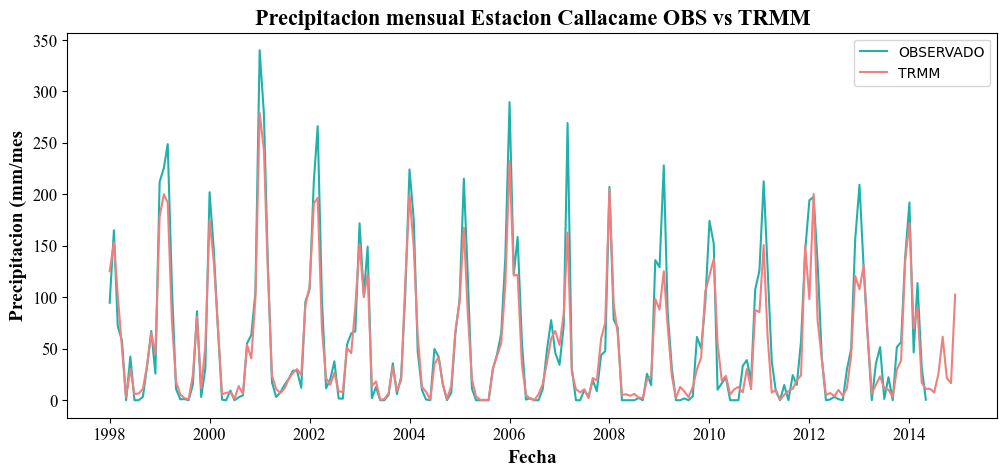

In [13]:
%matplotlib inline
plt.figure(figsize=(12,5))
plt.plot(pmm.DESA_OBS, color = "#20B2AA", linewidth = 1.5, linestyle = "solid", label = "OBSERVADO")
plt.plot(pmm.DESA_TRMM, color = "#F08080", linewidth = 1.5, linestyle = "solid", label = "TRMM")
plt.xlabel("Fecha", fontname="Times New Roman", fontsize=14, fontweight='bold')
plt.ylabel("Precipitacion (mm/mes", fontname="Times New Roman", fontsize=14, fontweight='bold')
plt.xticks(fontname="Times New Roman", fontsize=12)
plt.yticks(fontname="Times New Roman", fontsize=12)
plt.title("Precipitacion mensual Estacion Callacame OBS vs TRMM", fontname="Times New Roman", fontsize=16, fontweight='bold')
plt.legend()
plt.savefig("Fig02.png", dpi=600)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

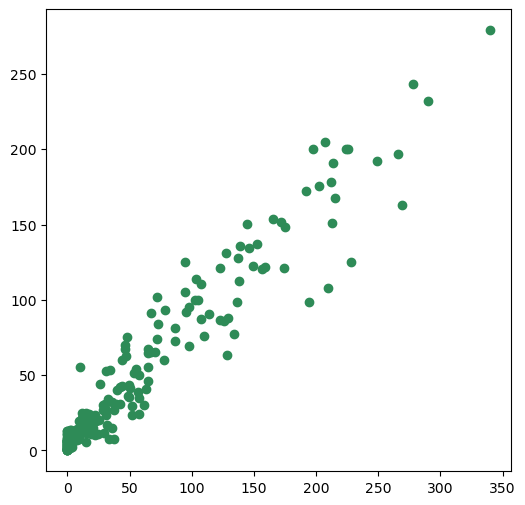

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(pmm.DESA_OBS, pmm.DESA_TRMM, color="#2E8B57")
plt.show